In [1]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [2]:
from os import listdir
from os.path import join

In [3]:
dataframes = []

for filepath in [join('../BensonData', f) for f in listdir('../BensonData')]:
    new_df = pd.read_csv(filepath, index_col=0)
    dataframes.append(new_df)

df1 = pd.concat(dataframes)
df1.reset_index(inplace=True)

In [4]:
df1.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY,ENTRY_DIFFS,EXIT_DIFFS,TOTAL_TRAFFIC,DDATE,DWEEKDAY
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050,2018-03-31 00:00:00,5,NaN,NaN,NaN,2018-03-30,4
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053,2018-03-31 04:00:00,5,7.0,3.0,10.0,2018-03-31,5
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053,2018-03-31 08:00:00,5,0.0,0.0,0.0,2018-03-31,5
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055,2018-03-31 12:00:00,5,0.0,2.0,2.0,2018-03-31,5
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055,2018-03-31 16:00:00,5,0.0,0.0,0.0,2018-03-31,5


In [5]:
df2 = (df1.sort_values(by=['STATION', 'C/A', 'SCP', 'LINENAME', 'UNIT'])
          .groupby(['STATION', 'LINENAME'],as_index=False)['TOTAL_TRAFFIC']
          .sum())

In [6]:
df3 = df2.sort_values(by=['TOTAL_TRAFFIC'],ascending=False).reset_index()[:10]
df3.head(10)

,index,STATION,LINENAME,TOTAL_TRAFFIC
0,313,GRD CNTRL-42 ST,4567S,27852140.0
1,90,34 ST-HERALD SQ,BDFMNQRW,21893193.0
2,94,34 ST-PENN STA,ACE,15704563.0
3,28,14 ST-UNION SQ,LNQR456W,14406701.0
4,103,42 ST-PORT AUTH,ACENQRS1237W,14078973.0
5,449,TIMES SQ-42 ST,1237ACENQRSW,12801085.0
6,303,FULTON ST,2345ACJZ,12064174.0
7,107,47-50 STS ROCK,BDFM,11039468.0
8,126,59 ST COLUMBUS,ABCD1,11034421.0
9,290,FLUSHING-MAIN,7,10757264.0


In [7]:
stations=df3['STATION'].tolist()
stations

['GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '34 ST-PENN STA',
 '14 ST-UNION SQ',
 '42 ST-PORT AUTH',
 'TIMES SQ-42 ST',
 'FULTON ST',
 '47-50 STS ROCK',
 '59 ST COLUMBUS',
 'FLUSHING-MAIN']

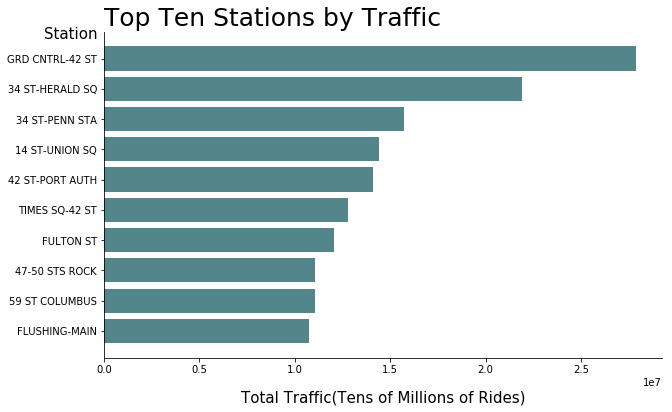

In [19]:
plt.figure(figsize= [10,6])
plt.barh(np.arange(10), df3['TOTAL_TRAFFIC'][::-1], color = '#53868B')
ax = gca()
plt.yticks(np.arange(10), df3['STATION'][::-1])
plt.title("Top Ten Stations by Traffic", size = 25, loc = 'left')
plt.xlabel('Total Traffic(Tens of Millions of Rides)', size = 15, labelpad = 15)
plt.ylabel('Station', size = 15, rotation = 0, labelpad = 35)
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()


In [9]:
# get a list of top 10 stations
# create AM PM labels

df1['datetime'] = pd.to_datetime(df1.DATETIME,infer_datetime_format=True)
df1['hour'] = df1['datetime'].dt.hour
df1['period'] = np.where(df1.hour >12, 'PM','AM')
dftop = df1.loc[df1['STATION'].isin(stations),:]
dftop.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,...,DATETIME,WEEKDAY,ENTRY_DIFFS,EXIT_DIFFS,TOTAL_TRAFFIC,DDATE,DWEEKDAY,datetime,hour,period
2613,2613,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,03/31/2018,00:00:00,REGULAR,...,2018-03-31 00:00:00,5,NaN,NaN,NaN,2018-03-30,4,2018-03-31 00:00:00,0,AM
2614,2614,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,03/31/2018,04:00:00,REGULAR,...,2018-03-31 04:00:00,5,77.0,56.0,133.0,2018-03-31,5,2018-03-31 04:00:00,4,AM
2615,2615,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,03/31/2018,08:00:00,REGULAR,...,2018-03-31 08:00:00,5,81.0,113.0,194.0,2018-03-31,5,2018-03-31 08:00:00,8,AM
2616,2616,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,03/31/2018,12:00:00,REGULAR,...,2018-03-31 12:00:00,5,251.0,442.0,693.0,2018-03-31,5,2018-03-31 12:00:00,12,AM
2617,2617,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,03/31/2018,16:00:00,REGULAR,...,2018-03-31 16:00:00,5,357.0,585.0,942.0,2018-03-31,5,2018-03-31 16:00:00,16,PM


In [10]:
# get the total entries for the top stations

ents = (dftop.sort_values(by=['STATION', 'C/A', 'SCP', 'LINENAME', 'UNIT'])
          .groupby(['STATION','period'], as_index=False)['ENTRY_DIFFS']
          .sum().sort_values(['STATION', 'period'],ascending=False))
#ents = ents.set_index('STATION')
#ents = ents.loc[stations]


exts = (dftop.sort_values(by=['STATION', 'C/A', 'SCP', 'LINENAME', 'UNIT'])
          .groupby(['STATION', 'period'], as_index=False)['EXIT_DIFFS']
          .sum().sort_values(['STATION', 'period'],ascending=False))



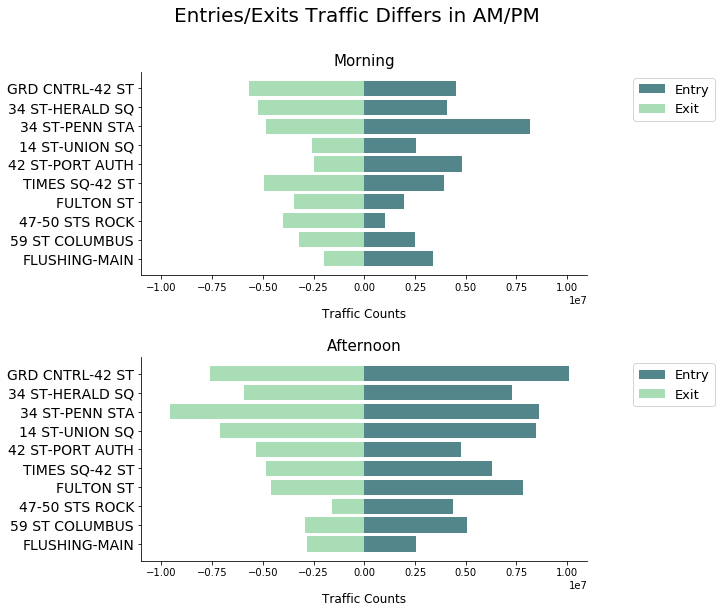

In [11]:
# display entries and exits for the top 10 stations
plt.figure(figsize= [8,9])
plt.suptitle('Entries/Exits Traffic Differs in AM/PM',fontsize = 20)
plt.subplots_adjust(hspace=.4)
ax1 = plt.subplot(211)
ax1.barh(np.arange(10), ents.loc[ents['period']=='AM'].set_index('STATION').loc[stations].ENTRY_DIFFS[::-1],color='#53868B')
ax1.barh(np.arange(10),-exts.loc[ents['period']=='AM'].set_index('STATION').loc[stations].EXIT_DIFFS[::-1],color='#a8ddb5')
plt.yticks(np.arange(10), stations[::-1], fontsize = 14)
plt.xlim([-11000000,11000000])
plt.title('Morning',fontsize = 15)
plt.xlabel('Traffic Counts', size = 12, labelpad = 15)
plt.legend(['Entry','Exit'],shadow = False, loc = 0, bbox_to_anchor=(1.3,1),fontsize=13);
    
ax2 = plt.subplot(212)
ax2.barh(np.arange(10), ents.loc[ents['period']=='PM'].set_index('STATION').loc[stations].ENTRY_DIFFS[::-1],color='#53868B')
ax2.barh(np.arange(10),-exts.loc[ents['period']=='PM'].set_index('STATION').loc[stations].EXIT_DIFFS[::-1],color='#a8ddb5')
plt.yticks(np.arange(10), stations[::-1], fontsize = 14)
plt.xlabel('Traffic Counts', size = 12, labelpad = 15)
plt.xlim([-11000000,11000000])
plt.title('Afternoon',fontsize = 15)
plt.legend(['Entry','Exit'],shadow = False, loc = 0, bbox_to_anchor=(1.3,1),fontsize=13);



sns.despine()

This figure provides the client with more specific information about the traffic flow. Client can decide if they want to target the entering riders or exiting riders, and pick the stations with high entering/exiting traffic based on the figure. For example, if the client prefers exiting traffic, they can deploy more efforts to the Grand Central station in the morning hours, and more staffs to the 34 St Penn Station in the PM.